In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import matplotlib.mlab as mlab
%matplotlib inline

In [29]:
df = pd.read_csv('framingham.csv')

In [30]:
df.dropna(axis=0,inplace=True)

In [31]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [32]:
df.diabetes.value_counts()

0    3559
1      99
Name: diabetes, dtype: int64

In [33]:
df.diabetes.value_counts(normalize=True)

0    0.972936
1    0.027064
Name: diabetes, dtype: float64

In [34]:
df.groupby("diabetes")["TenYearCHD"].value_counts(normalize=True)

diabetes  TenYearCHD
0         0             0.853330
          1             0.146670
1         0             0.646465
          1             0.353535
Name: TenYearCHD, dtype: float64

In [35]:
df.groupby("TenYearCHD")["diabetes"].value_counts(normalize=True)

TenYearCHD  diabetes
0           0           0.979361
            1           0.020639
1           0           0.937163
            1           0.062837
Name: diabetes, dtype: float64

In [36]:
df.groupby("diabetes")["sysBP"].mean()


diabetes
0    131.992835
1    145.949495
Name: sysBP, dtype: float64

In [37]:
df.groupby("diabetes")["sysBP"].median()


diabetes
0    128.0
1    142.0
Name: sysBP, dtype: float64

<AxesSubplot:>

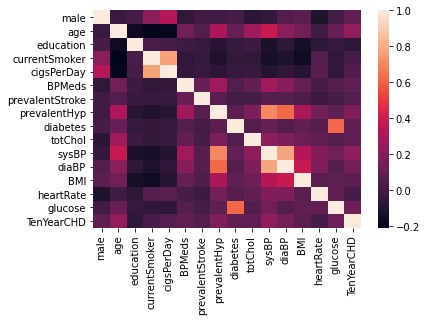

In [38]:
sn.heatmap(df.corr())

In [39]:
df.corr().sort_index()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
BMI,0.073111,0.137511,-0.137555,-0.159821,-0.087395,0.105642,0.036496,0.302949,0.089009,0.121056,0.330917,0.385348,1.000000,0.074131,0.083683,0.082055
BPMeds,-0.052124,0.134732,-0.013739,-0.051923,-0.046504,1.000000,0.113125,0.262910,0.049066,0.094083,0.271263,0.199630,0.105642,0.012889,0.054232,0.089152
TenYearCHD,0.091688,0.233983,-0.063279,0.019165,0.052014,0.089152,0.048366,0.181387,0.093431,0.091338,0.222821,0.150124,0.082055,0.020514,0.121990,1.000000
age,-0.024412,1.000000,-0.159499,-0.210771,-0.189295,0.134732,0.050893,0.306239,0.109092,0.268252,0.388267,0.208283,0.137511,-0.002722,0.118349,0.233983
cigsPerDay,0.330322,-0.189295,0.013790,0.773913,1.000000,-0.046504,-0.036286,-0.070460,-0.036961,-0.030400,-0.094781,-0.056746,-0.087395,0.064030,-0.053726,0.052014
currentSmoker,0.206114,-0.210771,0.025251,1.000000,0.773913,-0.051923,-0.038150,-0.108078,-0.041849,-0.051034,-0.134428,-0.115955,-0.159821,0.050841,-0.053242,0.019165
diaBP,0.051872,0.208283,-0.058059,-0.115955,-0.056746,0.199630,0.055834,0.617734,0.050686,0.174422,0.786669,1.000000,0.385348,0.178744,0.063540,0.150124
diabetes,0.013819,0.109092,-0.039627,-0.041849,-0.036961,0.049066,0.009625,0.080556,1.000000,0.048451,0.102552,0.050686,0.089009,0.060984,0.614820,0.093431
education,0.017729,-0.159499,1.000000,0.025251,0.013790,-0.013739,-0.030386,-0.078828,-0.039627,-0.013522,-0.124360,-0.058059,-0.137555,-0.064214,-0.031998,-0.063279
glucose,0.002940,0.118349,-0.031998,-0.053242,-0.053726,0.054232,0.016061,0.086942,0.614820,0.049884,0.134651,0.063540,0.083683,0.097074,1.000000,0.121990
